Dataset Loaded Successfully!

        Food_Item  Calories  Protein  Carbs   Fat          Diet_Type  \
0           Apple        52      0.3   14.0   0.2  Vegan, Vegetarian   
1          Banana        89      1.1   23.0   0.3  Vegan, Vegetarian   
2          Orange        47      0.9   12.0   0.1  Vegan, Vegetarian   
3  Chicken Breast       165     31.0    0.0   3.6     Non-Vegetarian   
4          Salmon       208     20.0    0.0  13.0     Non-Vegetarian   

  Allergens  Serving_Size (g)  
0       NaN               100  
1       NaN               100  
2       NaN               100  
3       NaN               100  
4       NaN               100  


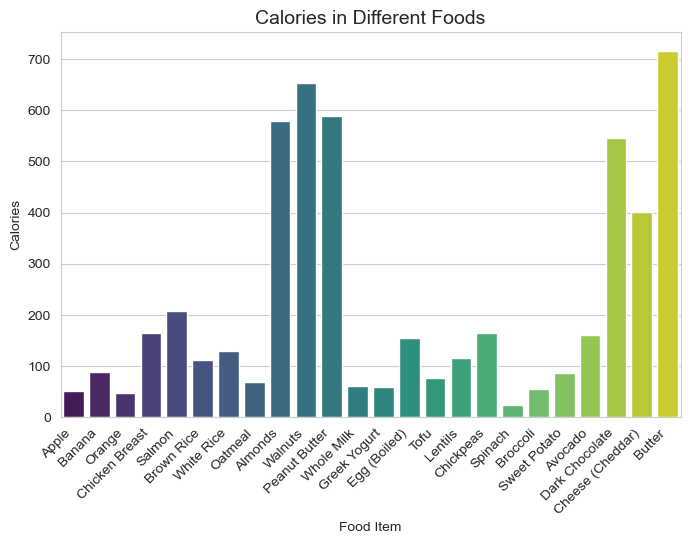

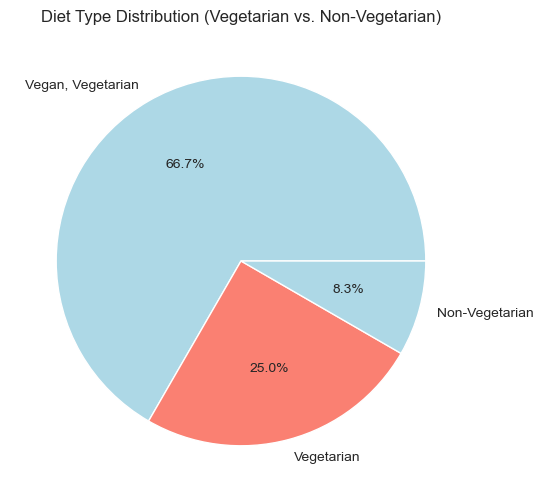

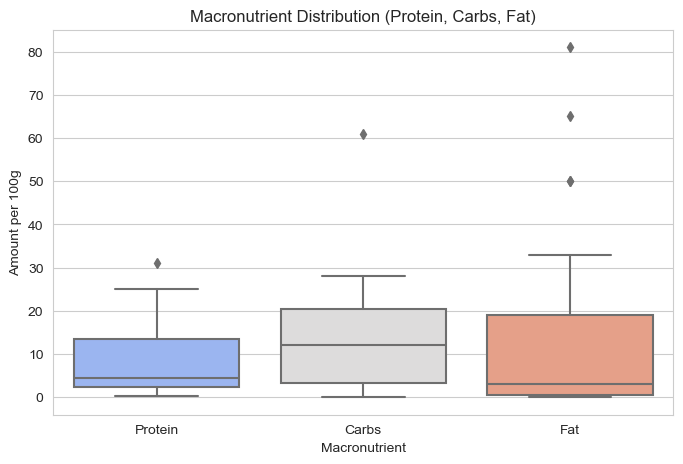

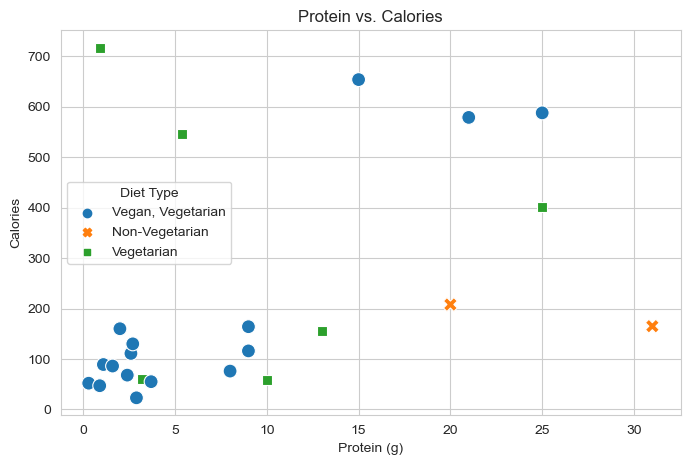

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Define the file path (Update if needed)
file_path = r"C:\Users\prava\OneDrive\diet.xlsx"

# Check if the file exists
if not os.path.exists(file_path):
    print(f"Error: File '{file_path}' not found. Please check the file path.")
else:
    # Load the dataset from Excel
    try:
        df = pd.read_excel(file_path)

        # Display first few rows
        print("Dataset Loaded Successfully!\n")
        print(df.head())

        # Check if required columns exist
        required_columns = {"Food_Item", "Calories", "Protein", "Carbs", "Fat", "Diet_Type"}
        if not required_columns.issubset(df.columns):
            print("\nError: Missing required columns in the dataset!")
        else:
            # Set style for plots
            sns.set_style("whitegrid")

            # 📊 **1. Bar Chart - Calories in Different Foods**
            plt.figure(figsize=(8, 5))
            sns.barplot(x="Food_Item", y="Calories", data=df, palette="viridis")
            plt.xticks(rotation=45, ha="right")
            plt.title("Calories in Different Foods", fontsize=14)
            plt.xlabel("Food Item")
            plt.ylabel("Calories")
            plt.show()

            # 🥗 **2. Pie Chart - Diet Type Distribution**
            plt.figure(figsize=(6, 6))
            df["Diet_Type"].value_counts().plot.pie(autopct="%1.1f%%", colors=["lightblue", "salmon"])
            plt.title("Diet Type Distribution (Vegetarian vs. Non-Vegetarian)")
            plt.ylabel("")  # Hide y-label
            plt.show()

            # 📉 **3. Box Plot - Macronutrient Distribution**
            plt.figure(figsize=(8, 5))
            df_melted = df.melt(id_vars=["Food_Item"], value_vars=["Protein", "Carbs", "Fat"], 
                                var_name="Nutrient", value_name="Amount")
            sns.boxplot(x="Nutrient", y="Amount", data=df_melted, palette="coolwarm")
            plt.title("Macronutrient Distribution (Protein, Carbs, Fat)")
            plt.xlabel("Macronutrient")
            plt.ylabel("Amount per 100g")
            plt.show()

            # 🔍 **4. Scatter Plot - Calories vs. Protein**
            plt.figure(figsize=(8, 5))
            sns.scatterplot(x="Protein", y="Calories", data=df, hue="Diet_Type", style="Diet_Type", s=100)
            plt.title("Protein vs. Calories")
            plt.xlabel("Protein (g)")
            plt.ylabel("Calories")
            plt.legend(title="Diet Type")
            plt.show()

    except Exception as e:
        print(f"\nError reading the file: {e}")
